# **Objective**


The Haberman's Survival Data Set is a dataset contains information about the survival status of patients who had undergone surgery for breast cancer. The dataset includes the following four columns:

1. Age: The age of the patient at the time of the surgery
2. Year of Operation: The year in which the surgery was performed
3. Number of Positive Axillary Nodes: The number of positive axillary nodes detected
4. Survival Status: This column has two possible values - 1 and 2. A value of 1 indicates that the patient survived for more than 5 years after the surgery,
while a value of 2 indicates that the patient died within 5 years of the surgery.

We are using the Haberman's Survival Data Set to analyze the factors that affect the survival rate of patients who have undergone surgery for breast cancer. The dataset can be used to develop predictive models that can help identify patients who are at a higher risk of dying within 5 years after surgery, this will help in the development of personalized treatment plans for such patients.

The problem that we are trying to solve using this dataset is to analyse the survival status of patients who have undergone surgery for breast cancer and determine which factors contribute the most towards the survival of a patient. The dataset provides information on various factors, such as the age of the patient, the year in which the surgery was performed, and the number of positive axillary nodes detected, all these factors can help us in analysing the survival status of a patient.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns\
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
data = pd.read_csv('/content/drive/MyDrive/haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])


In [ ]:
print(data.shape)

(306, 4)


The dataset has 306 rows and 4 coulmns.

In [ ]:
data.head(10)

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [ ]:
duplicates = data[data.duplicated()]

# Print the duplicates, if any
if len(duplicates) > 0:
    print("The dataset has", len(duplicates), "duplicate values.")
else:
    print("The dataset has no duplicate values.")

The dataset has 17 duplicate values.


In [ ]:
df = pd.DataFrame(data)
df.drop_duplicates(subset=None, inplace=True)
print(data.shape)
print(df.shape)

(306, 4)
(289, 4)


After removing the duplicate values, the dataset now has 289 rows and 4 coulmns.

In [ ]:
df.head(10)

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


# **Analysis of Dataset**

In [ ]:
df.columns

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')

Number of Features present in the dataset are 4. They are Age, Operation Year, Axil Nodes and Survival Status.

In [ ]:
num_points = len(df)
print(num_points)

289


In [ ]:
df.describe()

,age,operation_Year,axil_nodes,survival_status
count,289.000000,289.000000,289.000000,289.000000
mean,52.422145,62.906574,4.221453,1.273356
std,10.876915,3.275794,7.325239,0.446455
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,5.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
#if you don't put unique, it prints 289 as answer, which is the total number of points, 'unique' gives us the 2 classes present in survival status, which are 1 and 2
num_class = len(df['survival_status'].unique())
print(num_class)

2


Survival Status Class has 2 values.

In [ ]:
data_class = df['survival_status'].value_counts().to_dict()
print(data_class)

{1: 210, 2: 79}


Class 1 has 210 observations, while class 2 has 79 observations.

In [ ]:
survival = df[df['survival_status']==1]
print(survival.describe())

              age  operation_Year  axil_nodes  survival_status
count  210.000000      210.000000  210.000000            210.0
mean    51.871429       62.919048    2.985714              1.0
std     11.093239        3.260334    6.029813              0.0
min     30.000000       58.000000    0.000000              1.0
25%     43.000000       60.000000    0.000000              1.0
50%     52.000000       63.000000    1.000000              1.0
75%     59.750000       66.000000    3.000000              1.0
max     77.000000       69.000000   46.000000              1.0


The Number of people who have survived for more than 5 years after surgery is 210. The average age of patients is 51.87, the average number of axil nodes detected were 2.98.  

In [ ]:
survival1 = df[df['survival_status']==2]
print(survival1.describe())

             age  operation_Year  axil_nodes  survival_status
count  79.000000       79.000000   79.000000             79.0
mean   53.886076       62.873418    7.506329              2.0
std    10.203051        3.337307    9.255454              0.0
min    34.000000       58.000000    0.000000              2.0
25%    46.000000       59.500000    1.000000              2.0
50%    53.000000       63.000000    4.000000              2.0
75%    61.000000       65.000000   11.500000              2.0
max    83.000000       69.000000   52.000000              2.0


The Number of people who did not survive for more than 5 years after surgery is 79. The average age of patients is 53.88, the average number of axil nodes detected were 7.50.

## **Univariate Analysis**

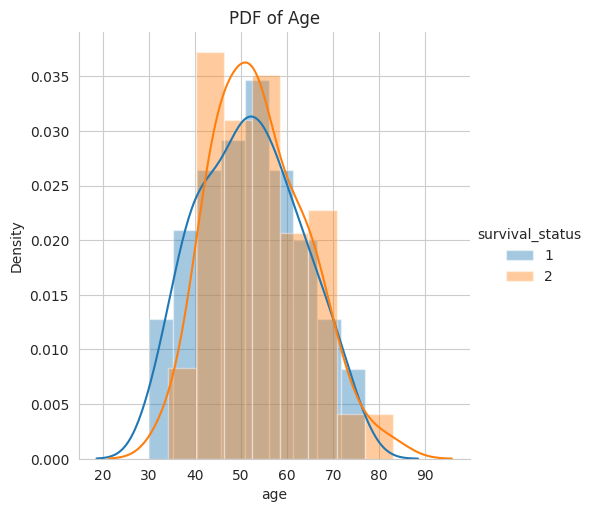

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="survival_status", height=5).map(sns.distplot, "age").add_legend()
plt.title('PDF of Age')
plt.show()

PDF plot: Probability Density Function (PDF) plot is a way to visualize the distribution of a continuous variable. The objective of this plot is to see the probability distribution of the Age feature in the dataset. From the plot, we can see that the Age feature is roughly normally distributed, with most patients falling between the age of 40 and 65. We can also see that the patients who survived for more than 5 years after the surgery tend to be younger than those who died within 5 years.

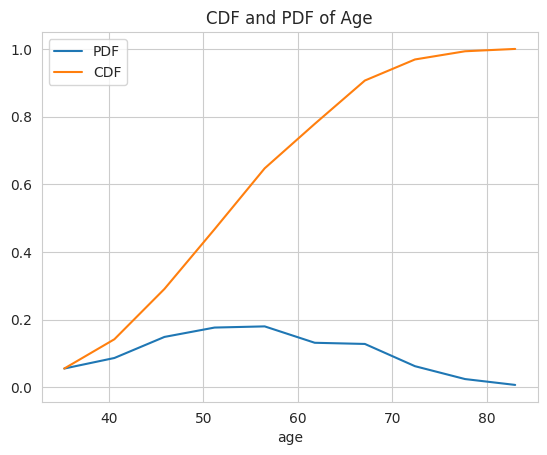

In [ ]:
counts, bin_edges = np.histogram(df['age'], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.xlabel('age')
plt.legend()
plt.title('CDF and PDF of Age')
plt.show()

CDF plot: Cumulative Distribution Function (CDF) plot is another way to visualize the distribution of a continuous variable. The objective of this plot is to see the cumulative distribution of the Age feature in the dataset. From the plot, we can see that about 80% of the patients are below the age of 70 and about 20% of the patients are below the age of 50.

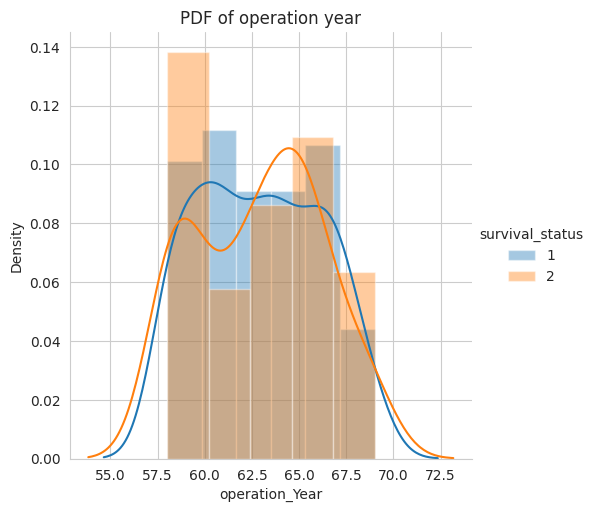

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="survival_status", height=5).map(sns.distplot, "operation_Year").add_legend()
plt.title('PDF of operation year')
plt.show()

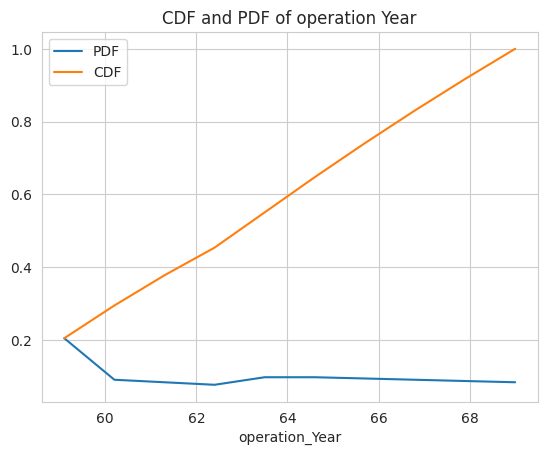

In [ ]:
counts, bin_edges = np.histogram(df['operation_Year'], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.xlabel('operation_Year')
plt.legend()
plt.title('CDF and PDF of operation Year')
plt.show()

For operation year, the PDF plot shows that the operation year distribution is roughly uniform, with a slight dip in the number of operations performed in the early 1960s. The CDF plot shows that there is no significant difference in the operation year distribution between the two survival status groups.

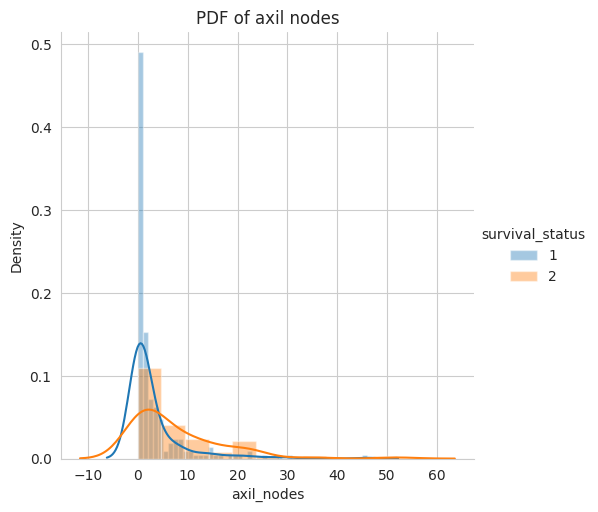

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="survival_status", height=5).map(sns.distplot, "axil_nodes").add_legend()
plt.title('PDF of axil nodes')
plt.show()


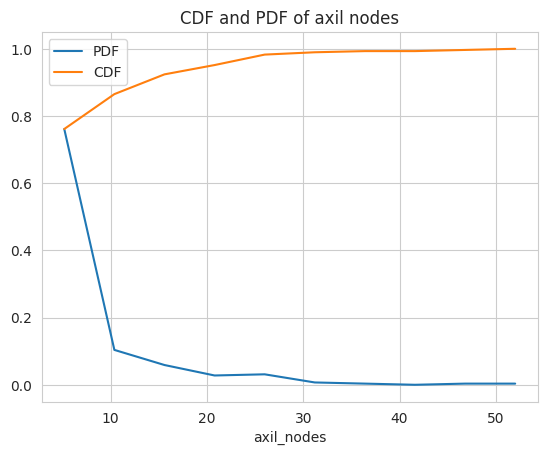

In [ ]:
counts, bin_edges = np.histogram(df['axil_nodes'], bins=10, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF')8
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.xlabel('axil_nodes')
plt.legend()
plt.title('CDF and PDF of axil nodes')
plt.show()

For axil nodes,The difference in axil nodes distribution between the two survival status groups is more pronounced compared to age and operation year, with the majority of patients who survived having 0-5 axil nodes detected, while the majority of patients who did not survive having more than 5 axil nodes detected.


Based on this analysis, the axil nodes feature provides the most information, as it has a distinct distribution between the two survival status groups and a clear cutoff point at 10 axil nodes. However, the other features can also provide some information, especially when combined with other features in a bivariate analysis.

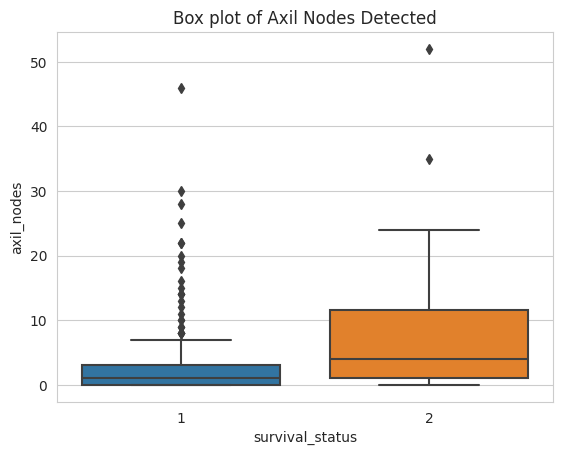

In [ ]:
sns.set_style("whitegrid")

# Box plot for axil_nodes
sns.boxplot(data=df, x="survival_status", y="axil_nodes")
plt.title('Box plot of Axil Nodes Detected')
plt.show()

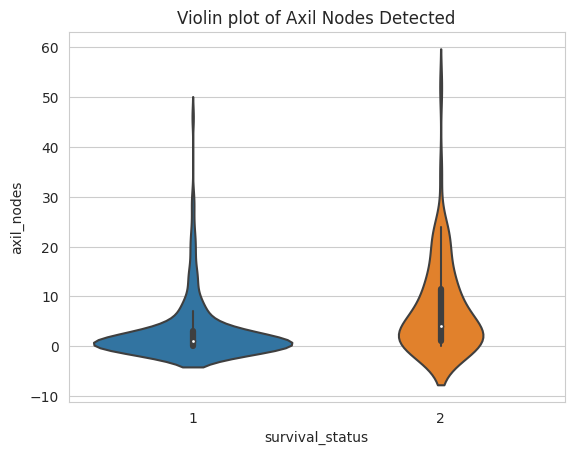

In [ ]:
sns.set_style("whitegrid")
# Violin plot for axil_nodes
sns.violinplot(data=df, x="survival_status", y="axil_nodes")
plt.title('Violin plot of Axil Nodes Detected')
plt.show()

1. Both plots suggest that patients who survived more than 5 years had, on average, fewer axil nodes detected than patients who did not survive more than 5 years.
2. The box plot shows that there is a wider range of axil node counts for patients who did not survive more than 5 years, with some patients having many more nodes detected than others.
3. The violin plot shows a more detailed view of the distribution of axil nodes, with the wider section of the plot indicating more patients having higher node counts. It also confirms that the distribution is more skewed towards higher values for patients who did not survive more than 5 years.
4. The box plot shows some outliers for both survival status groups, particularly for patients who did not survive more than 5 years. These outliers may represent patients with particularly high numbers of axil nodes detected.
5. Overall, both plots suggest that axil nodes are an important factor in predicting survival status, with patients who have fewer nodes detected generally having better survival outcomes.

## **Bivariate Analysis**


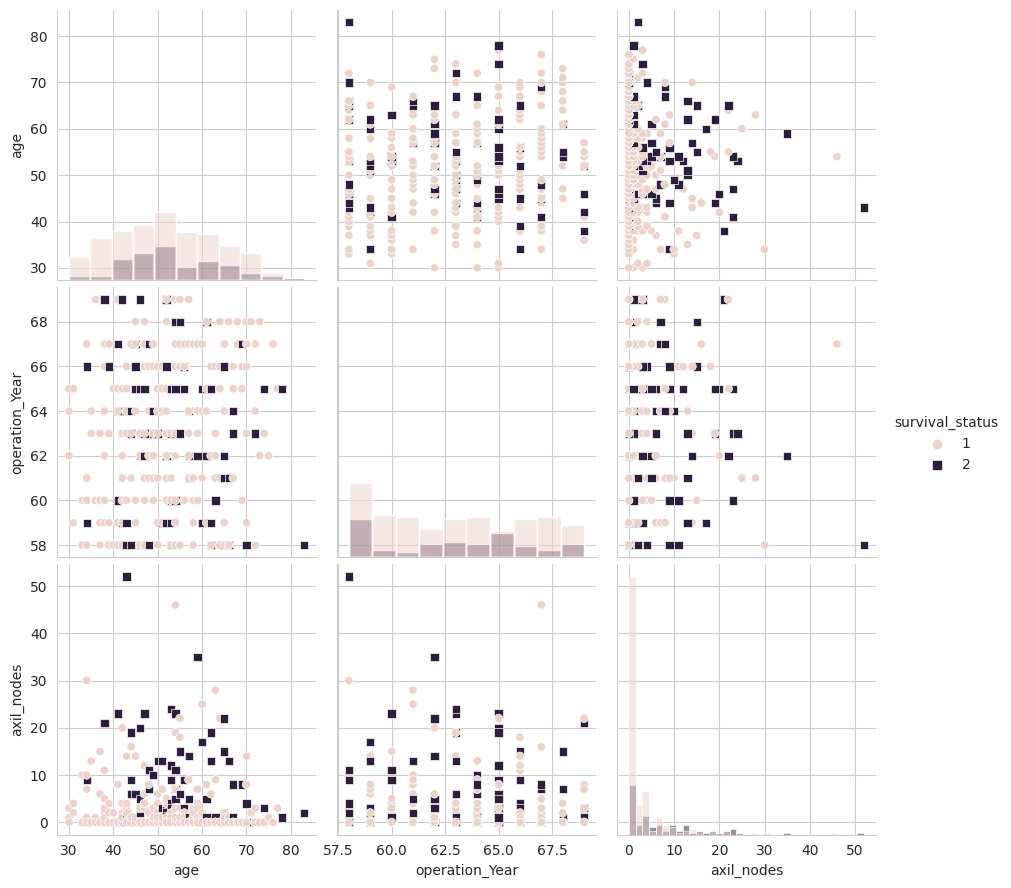

In [ ]:
sns.pairplot(df, hue="survival_status", diag_kind="hist", markers=["o", "s"], height=3)
plt.show()

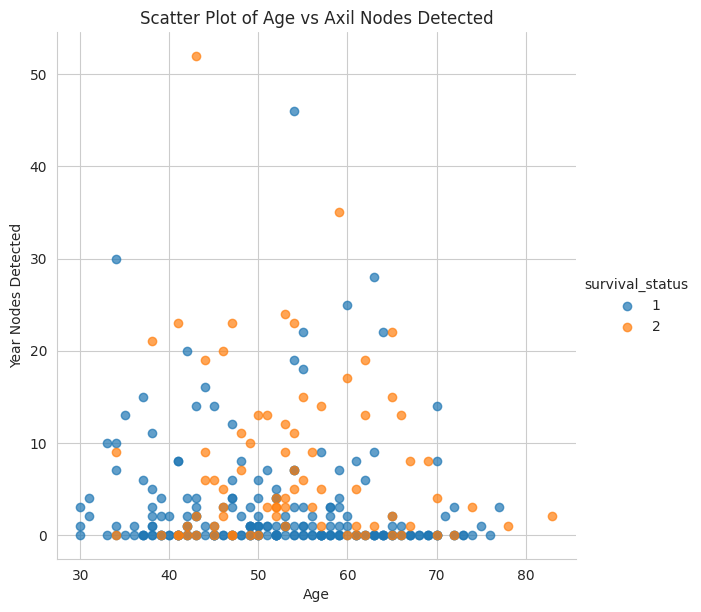

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="survival_status", height=6) \
   .map(plt.scatter, "age", "axil_nodes", alpha=.7) \
   .add_legend()
plt.title("Scatter Plot of Age vs Axil Nodes Detected")
plt.xlabel("Age")
plt.ylabel("Year Nodes Detected")
plt.show()

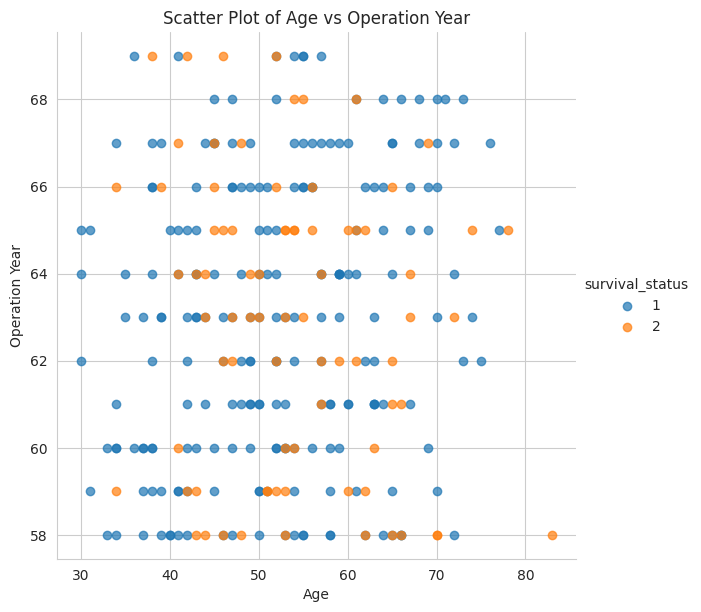

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="survival_status", height=6) \
   .map(plt.scatter, "age", "operation_Year", alpha=.7) \
   .add_legend()
plt.title("Scatter Plot of Age vs Operation Year")
plt.xlabel("Age")
plt.ylabel("Operation Year")
plt.show()

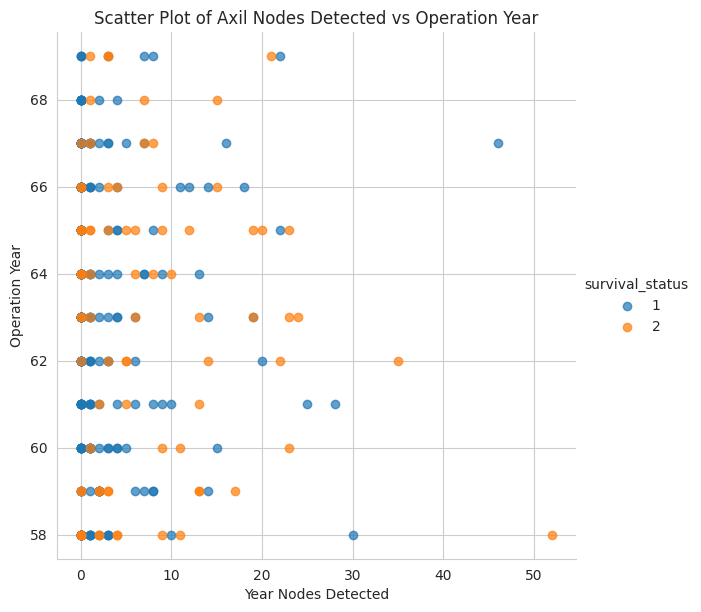

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="survival_status", height=6) \
   .map(plt.scatter, "axil_nodes", "operation_Year", alpha=.7) \
   .add_legend()
plt.title("Scatter Plot of Axil Nodes Detected vs Operation Year")
plt.xlabel("Year Nodes Detected")
plt.ylabel("Operation Year")
plt.show()

1. From the pair plot, we can see that age and axil nodes detected have some correlation with the status of the patients.
2. The scatter plot of age vs axil nodes detected doesn't show a clear separation between the two classes, but we can observe that most of the patients who survived have less than 10 axil nodes detected and are younger than 60.
3. The scatter plot of age vs operation year shows that most of the patients who survived had their surgery in the years between 1960 and 1964, while most of the patients who didn't survive had their surgery after 1964.
4. The scatter plot of axil nodes detected vs operation year doesn't show a clear separation between the two classes, but we can observe that most of the patients who survived had their surgery before 1966 and had less than 10 year nodes detected.

**Based on the exploratory analysis of the Haberman's Survival Dataset, here are some key observations:**

1. The dataset contains 306 observations with 4 features. The dataset initially contained 17 duplicate observations. When removed, the dataset now contains 289 observations.
2. The dataset consists of 3 Independent variables(Age, Operation Year and Axil Nodes), and 1 Dependent Vairable (Survival Status)
3. The "survival status" variable is the target variable and has two classes - 1 (patient survived for 5 or more years) and 2 (patient died within 5 years). Class 1 has 210 observations, while class 2 has 79 observations.
4. The most important feature for the classification task is 'Axil node' and the next feature is 'Age'. The patients who survived had a mean age of 51.87 years, standard deviation of 11.09 years and had a mean of 2.98 axil nodes detected and standard deviation of 6.02. On the other hand, the patients who didn't survive had a mean age of 53.88 years, standard deviation of 10.2 years and had a mean of 7.5 axil nodes detected and standard deviation of 9.25.
5. The bivariate scatter plot and the pair plot suggest that there is a clear relationship between the number of axil nodes detected and the patient's survival status. The majority of the patients who survived had less than 10 axil nodes detected, while the patients who didn't survive had more than 10 axil nodes detected. Age, on the other hand, doesn't seem to have a clear relationship with the patient's survival status.

In conclusion, the analysis suggests that the number of axil nodes detected is the most important feature for the classification task of predicting the patient's survival status. Age, on the other hand, doesn't seem to have a significant impact on the classification task as compared to Axil Node.